In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
Sequential = tf.keras.Sequential # 모델
Dense = tf.keras.layers.Dense # 뉴런
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 예제 데이터 생성 (X: 특성, y: 타겟 값)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([1.1, 1.9, 3.2, 4.1, 5.3, 5.9, 6.7, 7.6, 9.0, 9.8])

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNeighborsRegressor 모델 생성
knn = KNeighborsRegressor(n_neighbors=3)

# 모델 학습
knn.fit(X_train, y_train)

# 예측 수행
y_pred = knn.predict(X_test)

# 예측 결과 출력 및 성능 평가
print("Predicted values:", y_pred)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Predicted values: [8.03333333 2.8       ]
Mean Squared Error: 0.8722222222222227


20/20 [==============================] - 0s 4ms/step - loss: 0.1012 - accuracy: 0.9609
Loss: 0.10122883319854736, Accuracy: 0.9609120488166809
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 16)                144       
                                                                 
 dense_73 (Dense)            (None, 8)                 136       
                                                                 
 dense_74 (Dense)            (None, 16)                144       
                                                                 
 dense_75 (Dense)            (None, 8)                 136       
                                                                 
 dense_76 (Dense)            (None, 16)                144       
                                                                 
 dense_77 (Dense)            (None, 8)     

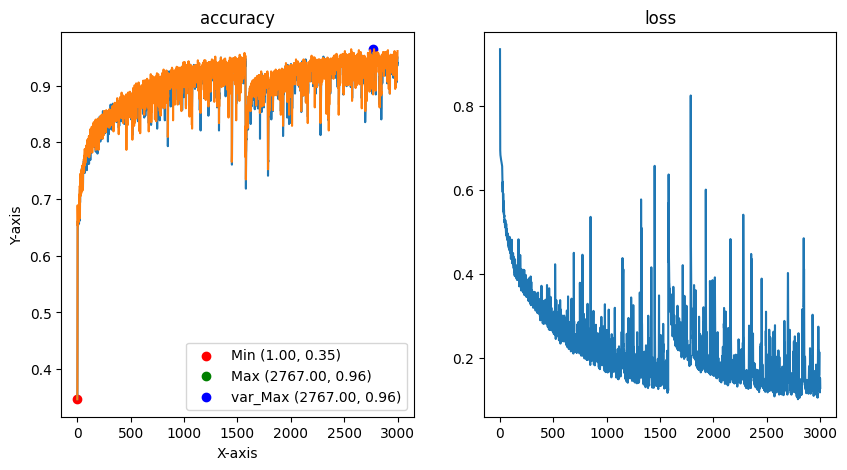

In [12]:
path = r'https://github.com/taehojo/deeplearning/raw/master/data/pima-indians-diabetes3.csv'
df = pd.read_csv(path, header=None)
df.columns = df.iloc[0]
df = df.iloc[1:, :]
# df = df.iloc[1:, :].astype('float')
# pregnant	plasma	pressure	thickness	insulin	bmi	pedigree	age	diabetes
df['pregnant'] = df['pregnant'].astype('int')
df['plasma'] = df['plasma'].astype('int')
df['pressure'] = df['pressure'].astype('int')
df['thickness'] = df['thickness'].astype('int')
df['insulin'] = df['insulin'].astype('int')
df['bmi'] = df['bmi'].astype('float')
df['pedigree'] = df['pedigree'].astype('float')
df['age'] = df['age'].astype('int')
df['diabetes'] = df['diabetes'].astype('int')
model = Sequential()

x_train = df.iloc[:, 0:8]
y_train = df['diabetes']

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model.add(Dense(8 * 2, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu')) # 은닉층의 수가 줄어드니까 더 잘나오나?
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = range(1,3001)
accuracy_arr = []
val_accuracy_arr = []
loss_arr = []
for epoch in epochs:
    history = model.fit(x_train, y_train, epochs=1, verbose=1, validation_data=(x_train, y_train))
    # history = model.fit(x_train, y_train, epochs=1, verbose=1, shuffle=True, validation_split=0.2)
    # 가중치와 편향 출력
    weights, biases = model.layers[0].get_weights()
    clear_output(wait=True) # clear_screen()
    print("에포크 (epoch):\n", epoch)
    # print("편향 (Biases):\n", biases)
    # print("가중치 (Weights):\n", weights)
    
    accuracy = history.history['accuracy'][0]
    accuracy_arr.append(accuracy)
    val_accuracy_arr.append(history.history['val_accuracy'][0])
    loss_arr.append(history.history['loss'])
    print("정확도 (Biases):\n", accuracy)
    if accuracy == 1.0 and epochs > 10 :
        print(f"정확도가 100%에 도달한 에포크: {epoch + 1}")
        break
clear_output(wait=True)
loss, accuracy = model.evaluate(x_train, y_train)
print(f'Loss: {loss}, Accuracy: {accuracy}')
model.summary()


# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1행 2열의 서브플롯


# 최소값과 최대값 표시
min_y, max_y = min(accuracy_arr), max(accuracy_arr)
min_x = epochs[np.argmin(accuracy_arr)]
max_x = epochs[np.argmax(accuracy_arr)]
max_val_y = max(val_accuracy_arr)

# 최소값과 최대값을 그래프에 표시
ax1.scatter(min_x, min_y, color='red', label=f'Min ({min_x:.2f}, {min_y:.2f})')
ax1.scatter(max_x, max_y, color='green', label=f'Max ({max_x:.2f}, {max_y:.2f})')
ax1.scatter(max_x, max_val_y, color='blue', label=f'var_Max ({max_x:.2f}, {max_y:.2f})')

# 레이블 및 범례 추가
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.legend()

# 첫 번째 서브플롯 (왼쪽)
ax1.plot(epochs, accuracy_arr)
ax1.plot(epochs, val_accuracy_arr)
ax1.set_title("accuracy")

# 두 번째 서브플롯 (오른쪽)
ax2.plot(epochs, loss_arr)
ax2.set_title("loss")
plt.show()

In [19]:
df # 768 * 9   diabetes 8
df.isna().sum()
# df.info()
df.head()
# help(df.set_index)
df.columns = df.iloc[0]
df.head()
df = df.iloc[1:, :]
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


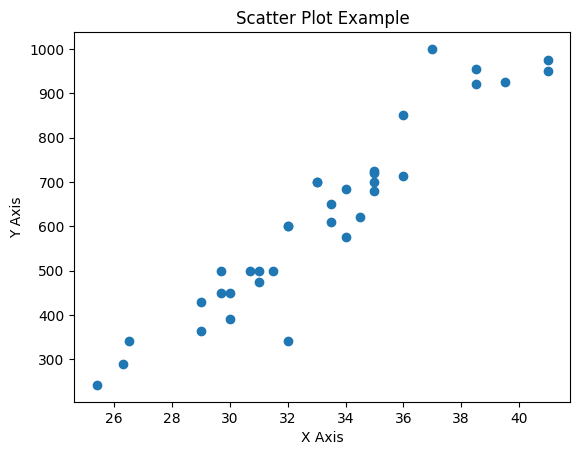

,bream_length,bream_weight
bream_length,1.000000,0.946256
bream_weight,0.946256,1.000000


In [15]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({'bream_length':bream_length, 'bream_weight':bream_weight})

# 산점도 그리기
plt.scatter(bream_length, bream_weight)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot Example')
plt.show()
df.corr()



0.9136797253622521
0.8372264746852778
[52.92301712]
-1130.5672841759565


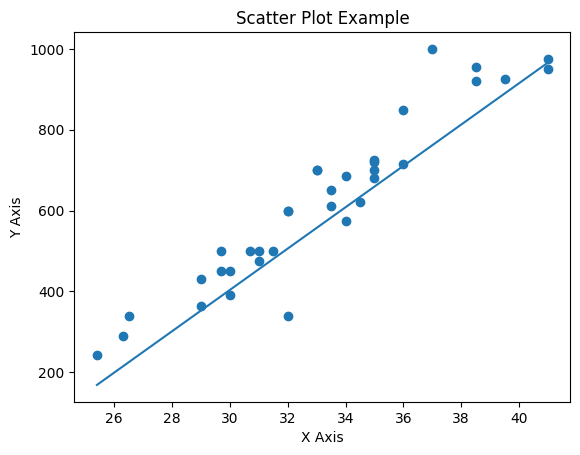

In [17]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #  선형회귀
bream_length = np.array(bream_length)
bream_weight = np.array(bream_weight)
train_input, test_input, train_target, test_target = train_test_split(bream_length, bream_weight)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
print(lr.coef_) #  기울기
print(lr.intercept_) # y절편

plt.scatter(bream_length, bream_weight)

# plt.plot([25.4, 242.0], [25.4, 51.13638816 * 25.4 + lr.intercept_])
plt.plot(bream_length, [x * 51.13638816 + lr.intercept_ for x in bream_length])
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot Example')
plt.show()

0.8738771873250225
0.9467755552196989
[ 0.         34.38744535  0.27918   ]
-831.2651847140262


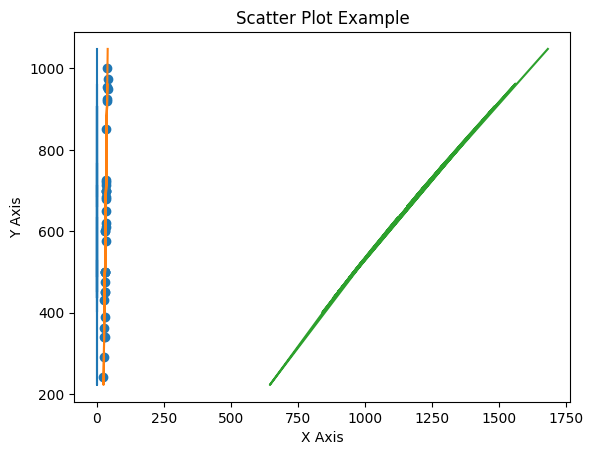

In [43]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #  선형회귀
from sklearn.preprocessing import PolynomialFeatures
bream_length = np.array(bream_length)
bream_weight = np.array(bream_weight)
train_input, test_input, train_target, test_target = train_test_split(bream_length, bream_weight)
poly = PolynomialFeatures(degree=2)
train_input = poly.fit_transform(train_input.reshape(-1,1))
test_input = poly.fit_transform(test_input.reshape(-1,1))
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
print(lr.coef_) #  기울기
print(lr.intercept_) # y절편
y = lr.predict(train_input)

plt.scatter(bream_length, bream_weight)

# plt.plot([25.4, 242.0], [25.4, 51.13638816 * 25.4 + lr.intercept_])
plt.plot(train_input, y)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot Example')
plt.show()
#  np.column_stack

In [ ]:
path = r'https://bit.ly/perch_csv_data'
# df = pd.read_csv(path, header=None)
df = pd.read_csv(path) 
df[' height']

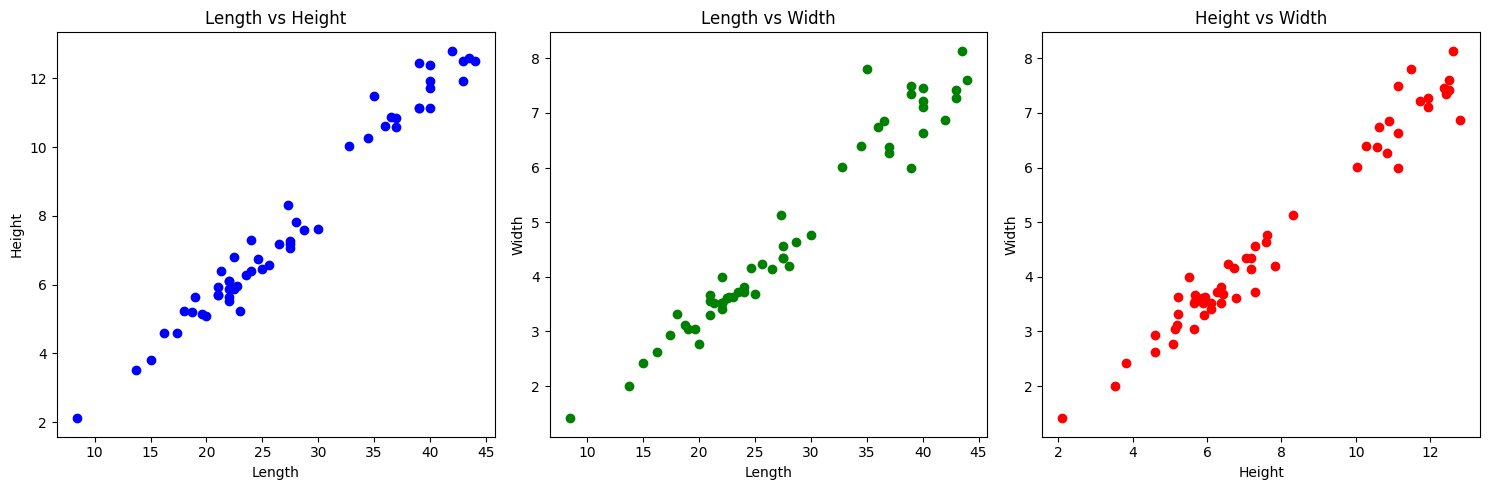

,length,height,width
length,1.000000,0.985620,0.974574
height,0.985620,1.000000,0.982843
width,0.974574,0.982843,1.000000


In [58]:
path = r'https://bit.ly/perch_csv_data'
# df = pd.read_csv(path, header=None)
df = pd.read_csv(path) 
# print(df.to_numpy())
plt.figure(figsize=(15, 5))
#length	height	width
# length vs height
plt.subplot(1, 3, 1)
plt.scatter(df['length'], df[' height'], color='blue')
plt.title('Length vs Height')
plt.xlabel('Length')
plt.ylabel('Height')

# length vs width
plt.subplot(1, 3, 2)
plt.scatter(df['length'], df[' width'], color='green')
plt.title('Length vs Width')
plt.xlabel('Length')
plt.ylabel('Width')

# height vs width
plt.subplot(1, 3, 3)
plt.scatter(df[' height'], df[' width'], color='red')
plt.title('Height vs Width')
plt.xlabel('Height')
plt.ylabel('Width')

plt.tight_layout()
plt.show()
df.corr()